<h1 id="tocheading">061119 Data Preparation for Notebooks in General</h1>
<div id="toc"></div>

Goal of this notebook is to preprocess 2016-2019 data into a nice csv for followon analysis.  Will use lc_utils.py


<img src="https://github.com/dustinvanstee/random-public-files/raw/master/techu-banner.png" width="800" height="500" align="middle"/>

### Import Libraries

In [1]:
# Code functions that are needed to run this lab
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
from datetime import datetime
import math

import pandas as pd
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import glob


import numpy as np

import sys
sys.path.append('../utils/') 
from lc_utils import *


In [2]:
%load_ext autoreload
%autoreload 2
import lc_utils as lc
lc.CLASS_ENVIRONMENT = 'acc'

### Load the Data
Here we load data that was previously downloaded from lendingclub.com.  For speed of this lab, we are restricting the number of loans ~ 130K

In [3]:
!pwd
loan_df = lc.load_sample_data('acc')
loan_df_orig = loan_df
loan_df.head()


/gpfs/gpfs_gl4_16mb/s4s004/vanstee/2019-06-lendingclub-git/dataprep_common
**load_sample_data** : Setting data location to /gpfs/gpfs_gl4_16mb/s4s004/vanstee/2019-06-lendingclub-git/rawdata/
**load_sample_data** : Found 13 files.  CSV files = ['/gpfs/gpfs_gl4_16mb/s4s004/vanstee/2019-06-lendingclub-git/rawdata/LoanStats_securev1_2018Q1.csv.gz', '/gpfs/gpfs_gl4_16mb/s4s004/vanstee/2019-06-lendingclub-git/rawdata/LoanStats_securev1_2017Q3.csv.gz', '/gpfs/gpfs_gl4_16mb/s4s004/vanstee/2019-06-lendingclub-git/rawdata/LoanStats_securev1_2019Q1.csv.gz', '/gpfs/gpfs_gl4_16mb/s4s004/vanstee/2019-06-lendingclub-git/rawdata/LoanStats_securev1_2016Q2.csv.gz', '/gpfs/gpfs_gl4_16mb/s4s004/vanstee/2019-06-lendingclub-git/rawdata/LoanStats_securev1_2018Q4.csv.gz', '/gpfs/gpfs_gl4_16mb/s4s004/vanstee/2019-06-lendingclub-git/rawdata/LoanStats_securev1_2018Q2.csv.gz', '/gpfs/gpfs_gl4_16mb/s4s004/vanstee/2019-06-lendingclub-git/rawdata/LoanStats_securev1_2018Q3.csv.gz', '/gpfs/gpfs_gl4_16mb/s4s004/vanstee

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,debt_settlement_flag,debt_settlement_flag_date,deferral_term,delinq_2yrs,delinq_amnt,desc,disbursement_method,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,hardship_amount,hardship_dpd,hardship_end_date,hardship_flag,hardship_last_payment_amount,hardship_length,hardship_loan_status,hardship_payoff_balance_amount,hardship_reason,hardship_start_date,hardship_status,hardship_type,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,next_pymnt_d,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,orig_projected_additional_accrued_interest,out_prncp,out_prncp_inv,payment_plan_start_date,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_bal_joint,revol_util,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_mths_since_last_major_derog,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,settlement_amount,settlement_date,settlement_percentage,settlement_status,settlement_term,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code
0,0.0,8.0,PA,52.0,53700.0,NaN,Individual,5713.0,20806.0,7.5,0.0,0.0,0.0,N,NaN,NaN,0.0,0.0,NaN,Cash,28.56,NaN,Nov-2001,10+ years,Facility manager,779.0,775.0,2500.0,2500.0,A,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MORTGAGE,130966408,85.0,w,3.0,4.0,3.0,76.87,6.71%,Mar-2018,Apr-2018,779.0,775.0,0.0,NaN,2500.0,Issued,1518.0,NaN,147.0,196.0,4.0,1.0,3.0,NaN,NaN,NaN,1.0,52.0,NaN,1.0,NaN,Apr-2018,0.0,2.0,6.0,4.0,8.0,20.0,10.0,15.0,6.0,20.0,0.0,0.0,0.0,5.0,20.0,4.0,8.0,4.0,6.0,1.0,2.0,NaN,2500.0,2500.0,NaN,100.0,0.0,1.0,0.0,0.0,other,n,0.0,8289.0,NaN,15.6%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A3,0.0,36 months,Other,0.0,114256.0,225791.0,38.0,58875.0,50586.0,22500.0,11.0,59491.0,0.0,0.0,0.0,0.0,0.0,53100.0,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,NaN,166xx
1,0.0,2.0,OR,61.0,40000.0,110000.0,Joint App,51837.0,15700.0,51.8,0.0,0.0,0.0,N,NaN,NaN,0.0,0.0,NaN,Cash,27.78,12.15,Mar-2003,6 years,Dental assistance/administration,729.0,725.0,25000.0,25000.0,C,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MORTGAGE,130846589,NaN,w,0.0,1.0,0.0,563.85,12.61%,Mar-2018,Mar-2018,729.0,725.0,0.0,NaN,25000.0,Issued,7471.0,NaN,125.0,180.0,19.0,19.0,2.0,NaN,NaN,NaN,57.0,24.0,NaN,11.0,NaN,Apr-2018,0.0,3.0,4.0,5.0,8.0,3.0,7.0,11.0,5.0,8.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,25000.0,25000.0,NaN,100.0,40.0,1.0,0.0,0.0,debt_consolidation,n,0.0,107401.0,35634.0,60.6%,0.0,0.0,Mar-2003,694.0,690.0,0.0,2.0,NaN,11.0,10.0,0.0,56.0,NaN,NaN,NaN,NaN,NaN,C1,0.0,60 months,Debt consolidation,0.0,414695.0,502520.0,16.0,107401.

In [4]:
loan_df.memory_usage(index=True).sum()
# 1.8 GB

1810537664

### Descriptive Statistics (1D)
Lets look at some 1D and 2D descriptive statistics for this dataset

In this dataset, we have all types of data.  Numerical, Categorical, Ranked data.  This small module will take you through what is typical done to quickly understand the data



In [5]:
# This function provide the number of rows/cols
# Information on the types of data
# and a report of descriptive statistics

quick_overview_1d(loan_df)

**quick_overview_1d** : There are 1488929 observations in the dataset.
**quick_overview_1d** : There are 151 variables in the dataset.
**quick_overview_1d** : 
Categorical vs Numerical
**quick_overview_1d** : use df.dtypes ...
float64    111
object      40
Name: type, dtype: int64
**quick_overview_1d** : 
******************Dataset Descriptive Statistics (numerical columns only) *****************************

 running df.describe() ....


,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,annual_inc_joint,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,deferral_term,delinq_2yrs,delinq_amnt,dti,dti_joint,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,hardship_amount,hardship_dpd,hardship_last_payment_amount,hardship_length,hardship_payoff_balance_amount,il_util,inq_fi,inq_last_12m,inq_last_6mths,installment,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,loan_amnt,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,orig_projected_additional_accrued_interest,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,recoveries,revol_bal,revol_bal_joint,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_mths_since_last_major_derog,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,settlement_amount,settlement_percentage,settlement_term,tax_liens,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim
count,1.488903e+06,1.488903e+06,1.488599e+06,1.488903e+06,1.368800e+05,1.488838e+06,1.470613e+06,1.469939e+06,1.488903e+06,1.488903e+06,1.488903e+06,3488.0,1.488903e+06,1.488903e+06,1.486937e+06,136878.000000,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,3488.000000,3488.000000,3488.000000,3488.0,3488.000000,1.271557e+06,1.488842e+06,1.488841e+06,1.488902e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488842e+06,0.0,1.442147e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,718944.000000,384050.000000,235515.000000,1.442092e+06,1.471640e+06,334667.000000,1.315805e+06,482305.000000,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.429722e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488841e+06,1.488842e+06,1.488842e+06,1.488842e+06,1.488842e+06,1.488842e+06,2997.000000,1.488903e+06,1.488903e+06,1.488901e+06,1.470554e+06,1488903.0,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.247010e+05,124702.000000,124702.000000,124702.000000,124702.000000,124702.000000,124702.000000,40843.000000,124702.000000,124702.000000,124702.000000,122635.000000,2855.000000,2855.000000,2855.000000,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488842e+06,1.488903e+06,1.488841e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06,1.488903e+06
mean,3.323252e-03,4.555543e+00,5.675831e+01,8.030893e+04,1.255863e+05,1.372662e+04,1.312138e+04,5.388462e+01,8.122759e-03,3.150767e+00,2.027802e-02,3.0,2.962134e-01,1.244857e+01,1.936156e+01,19.290364,7.054259e+02,7.014256e+02,1.534701e+04,1.534257e+04,176.645269,9.397076,189.533354,3.0,13541.861204,6.901177e+01,1.022111e+00,2.021505e+00,4.962234e-01,4.539922e+02,7.040799e+02,6.979176e+02,1.739123e+03,1.534703e+04,5.850970e+03,NaN,1.247986e+02,1.793331e+02,1.445447e+01,8.390112e+00,1.427078e+00,34.974898,45.356675,74.472170,2.114291e+01,2.490724e+01,38.928917,7.172425e+00,35.845409,5.055447e-01,3.652508e+00,5.524736e+00,4.818579e+00,7.301110e+00,8.400404e+00,8.210035e+00,1.337686e+01,5.463827e+00,1.1623

Here we can get a quick assessment of the statistics for each column.  
**Quick Question** can you answer what was the average income for the 133K loan applicants ?

### Descriptive Statistics (2D)
Since we have over 100 numerical variables, creating a 2D correlation plot may be time consuming and difficult to interpret.  Lets look at correlations on a smaller scale for now....


**quick_overview_2d** : There are 1488929 observations in the dataset.
**quick_overview_2d** : There are 151 variables in the dataset.


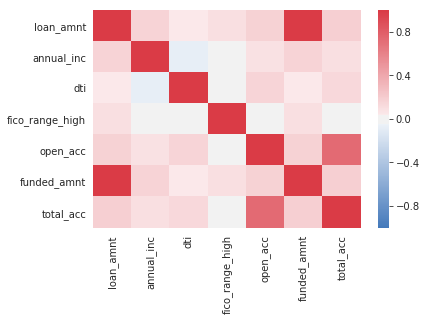

In [6]:
# Grab only a subset of columns
cols = ["loan_amnt","annual_inc","dti","fico_range_high","open_acc",'funded_amnt', 'total_acc']
quick_overview_2d(loan_df, cols)

**Quick Question** : Can you find a negatively correlated variable to annual_inc in the chart above?  Can you think of a reason for this result ?

### Create Loan Default column.  This is the column we will predict later
The **loan_status** column contains the information of whether or not the loan is in default. 

This column has more than just a 'default or paid' status.  Since our goal is to build a simple default classifier , we need to make a new column based off the **loan_status** column.

Here we will look at all the categorical values in **loan_status**, and create a new column called **default** based off that one.


In [7]:
# function to create loan status .... 
loan_df = create_loan_default(loan_df)
loan_df.head(3) # scroll to the right, and see the new 'default' column

**create_loan_default** : Unique values in loan_status
Current               1213874
Fully Paid             173012
Charged Off             40634
Late (31-120 days)      23683
Issued                  18988
In Grace Period         13169
Late (16-30 days)        5489
Default                    54
Name: loan_status, dtype: int64
**create_loan_default** : Dropping other values that are highly correlated with loan_status
**create_loan_default** : Dropping loan_status,total_rec_prncp,total_pymnt,total_pymnt_inv
**create_loan_default** : Unique values in default
0    1419069
1      69860
Name: default, dtype: int64


,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,debt_settlement_flag,debt_settlement_flag_date,deferral_term,delinq_2yrs,delinq_amnt,desc,disbursement_method,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,hardship_amount,hardship_dpd,hardship_end_date,hardship_flag,hardship_last_payment_amount,hardship_length,hardship_loan_status,hardship_payoff_balance_amount,hardship_reason,hardship_start_date,hardship_status,hardship_type,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,last_pymnt_d,loan_amnt,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,next_pymnt_d,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,orig_projected_additional_accrued_interest,out_prncp,out_prncp_inv,payment_plan_start_date,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_bal_joint,revol_util,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_mths_since_last_major_derog,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,settlement_amount,settlement_date,settlement_percentage,settlement_status,settlement_term,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_rec_int,total_rec_late_fee,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code,default
0,0.0,8.0,PA,52.0,53700.0,NaN,Individual,5713.0,20806.0,7.5,0.0,0.0,0.0,N,NaN,NaN,0.0,0.0,NaN,Cash,28.56,NaN,Nov-2001,10+ years,Facility manager,779.0,775.0,2500.0,2500.0,A,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MORTGAGE,130966408,85.0,w,3.0,4.0,3.0,76.87,6.71%,Mar-2018,Apr-2018,779.0,775.0,0.0,NaN,2500.0,1518.0,NaN,147.0,196.0,4.0,1.0,3.0,NaN,NaN,NaN,1.0,52.0,NaN,1.0,NaN,Apr-2018,0.0,2.0,6.0,4.0,8.0,20.0,10.0,15.0,6.0,20.0,0.0,0.0,0.0,5.0,20.0,4.0,8.0,4.0,6.0,1.0,2.0,NaN,2500.0,2500.0,NaN,100.0,0.0,1.0,0.0,0.0,other,n,0.0,8289.0,NaN,15.6%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A3,0.0,36 months,Other,0.0,114256.0,225791.0,38.0,58875.0,50586.0,22500.0,11.0,59491.0,0.0,0.0,53100.0,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,NaN,166xx,0
1,0.0,2.0,OR,61.0,40000.0,110000.0,Joint App,51837.0,15700.0,51.8,0.0,0.0,0.0,N,NaN,NaN,0.0,0.0,NaN,Cash,27.78,12.15,Mar-2003,6 years,Dental assistance/administration,729.0,725.0,25000.0,25000.0,C,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MORTGAGE,130846589,NaN,w,0.0,1.0,0.0,563.85,12.61%,Mar-2018,Mar-2018,729.0,725.0,0.0,NaN,25000.0,7471.0,NaN,125.0,180.0,19.0,19.0,2.0,NaN,NaN,NaN,57.0,24.0,NaN,11.0,NaN,Apr-2018,0.0,3.0,4.0,5.0,8.0,3.0,7.0,11.0,5.0,8.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,25000.0,25000.0,NaN,100.0,40.0,1.0,0.0,0.0,debt_consolidation,n,0.0,107401.0,35634.0,60.6%,0.0,0.0,Mar-2003,694.0,690.0,0.0,2.0,NaN,11.0,10.0,0.0,56.0,NaN,NaN,NaN,NaN,NaN,C1,0.0,60 months,Debt consolidation,0.0,414695.0,502520.0,16.0,107401.0,0.0,32600.0,2.0,0.0,0.0,0.0,126600.0,https://lendingclub.com/browse/lo

### Data Preparation - Handle Null Values aka NaNs ...

One part of the data science process thats especially time consuming is working with unclean data.  This lending club data set is a great example of that.  If you look at the dataframe shown above, you will see a number of columns with the indicator **NaN** .  This means 'not a number' and needs to be dealt with prior to any machine learning steps.  You have many options here.  Some options are listed below...

* Fill with a value -> impute mean/median/min/max/other
* drop rows with NaNs
* drop columns with large number of NaNs 
* use data in other columns to derive

All these methods are possible, but its up to the data scientist / domain expert to figure out the best approach.  There is definitely some grey area involved in whats the best approach.

First, lets understand which columns have NaNs...

In [8]:
# For every column, count the number of NaNs .... 
# code hint : uses df.isna().sum()

columns_with_nans(loan_df)

**columns_with_nans** : acc_now_delinq                                     26
acc_open_past_24mths                               26
addr_state                                         26
all_util                                          330
annual_inc                                         26
annual_inc_joint                              1352049
application_type                                   26
avg_cur_bal                                        91
bc_open_to_buy                                  18316
bc_util                                         18990
chargeoff_within_12_mths                           26
collection_recovery_fee                            26
collections_12_mths_ex_med                         26
debt_settlement_flag                               26
debt_settlement_flag_date                     1486074
deferral_term                                 1485441
delinq_2yrs                                        26
delinq_amnt                                        26
desc


As you can see, we have some work to do to clean up the NaN values.  Beyond NaN values, we also have to transform columns if they aren't formatted correctly, or maybe we want to transform a column based on custom requirements.  

```
Example : column=employee_length , values=[1,2,3,4,5,6,7,8,9,10+] formatted as a string
          transform into 
          column=employee_length, [0_3yrs,4_6yrs,gt_6yrs] (categorical:strings)
```
          
Luckily, we took care to process and clean this data below using a few functions.  In practice, **this is where data scientists spend a large portion of their time** as this requires detailed domain knowledge to clean the data.  We have made a fair number of assumptions about how to process the data which we won't go into due to time contraints for the lab.

In [ ]:
# The following cleaning of the data makes use of the steps shown below.....

#loan_df1 = drop_sparse_numeric_columns(loan_df)
#loan_df2 = drop_columns(loan_df1)
#loan_df3 = impute_columns(loan_df2)
#loan_df4 = handle_employee_length(loan_df3)
#loan_df5 = handle_revol_util(loan_df4)
#loan_df6 = drop_rows(loan_df5)

loan_df = clean_lendingclub_data(loan_df)


In [ ]:
# Final Sanity check ....
# If we did our job right, there should not be any NaN's left.  
# Use this convenience function to check

# code hint df.isna().sum()

columns_with_nans(loan_df)

### Data Preparation - Handle Time Objects
Sometimes for columns that contain date information, you may want to break them down into individual columns like month, day, day of week etc.  For our use case, we will create a new column called `time_history` that will indicate how long an applicant has been a borrower.  This is an example of **feature engineering**.  Essentially, using business logic to create a new column (feature) that may have predictive value.

In [ ]:
loan_df = create_time_features(loan_df)
loan_df.head(3)

### Convert Categorical Data to One hot encode ###

If you look above at the data frame, we are almost ready to start building models.  However, there is one important step to complete.  Notice we have some columns that are still built out of string data 
```
example column=home_ownership values=[RENT, MORTGAGE, OWN]
```
Machine learning algorithms only process numerical data, so we need to transform these **categorical columns** into **indicator columns**

From the example above, the transform would yield 3 new columns

```
example column=RENT values=[0,1]
        column=MORTGAGE values=[0,1]
        column=OWN values=[0,1]
```

Conveniently pandas has a nice function called **get_dummies** that we will use for this purpose

In [ ]:
# Transform categorical data into binary indicator columns
# code hint, uses pd.get_dummies

loan_df = one_hot_encode_keep_cols(loan_df)
loan_df.head() # once complete, see how many new columns you have!

### Final Result after data preparation ....

Ok, so you made it here, lets take a look at the final results of your data preparation work.  It may be helpful to  **qualitatively compare** your original data frame to this one and see how different they look..  Execute the cells below to get a sense of what the tranformations accomplished.

In [ ]:
loan_df_orig.head(3)

In [ ]:
loan_df.head(3)

### Data Visualization
As you saw, when you 'describe' a data frame, you get a table statistics showing you the mean,min,max and other statistics about each column.  This is good, but sometimes its also good to look at the histograms of the data as well.  Lets Visualize some of the distributions from our dataset


<img src="https://github.com/dustinvanstee/random-public-files/raw/master/data-visualization.png" width="800" height="500" align="middle"/>

In [ ]:
# Here we plot distribution charts for all the numerical columns in our dataframe
plot_histograms(loan_df)

## Brunel Visualization Examples
### The Growth of Lending Club
Here we use the builtin Brunel Visualization graphics package.  This documentation was useful in the preparation of the following graphs.
* https://brunel.mybluemix.net/docs/Brunel%20Documentation.pdf

In [ ]:
# Build a statistics data frame based on issue date
# aggregate on loan amount
vis_df = loan_df_orig.copy()
vis_df['default'] = loan_df['default']

### Outcome Variable: Loan Status
On the left is the breakdown of all loan status classifications.  On the right is our simple default classification based on our data prep

In [ ]:
a=vis_df.sample(5000) # downsample for speed
%brunel data('a') bar x(loan_status) y(#count:linear) color(loan_status)  percent(#count:overall) tooltip(#all) | stack polar bar y(#count) color(default) percent(#count) tooltip(#all) :: width=1200, height=350 

### Borrowing by State 
Most of the money in terms of absolute borrowing is borrowed by people from California. For average loan amount per state, Alaska ranks on top.

In [ ]:
state_stats = pd.concat([vis_df.groupby('addr_state').sum()['loan_amnt'].to_frame().rename(columns = {'loan_amnt':'state_total'}), vis_df.groupby('addr_state').mean()['loan_amnt'].to_frame().rename(columns = {'loan_amnt':'state_mean'})], axis=1)
%brunel data('state_stats') map color(state_total:[blues, reds]) key(ADDR_STATE) label(ADDR_STATE) tooltip(#all) title("Total Loan Amount by State") style('.header {label-location:left}')| map color(state_mean:[blues, reds]) key(ADDR_STATE) label(ADDR_STATE) tooltip(#all) title("Average Loan Amount by State") style('.header {label-location:left}') :: width=1200, height=350 

### Loan Purpose
Lets try to get a sense of why people are borrowing ...

In [ ]:
purpose_count = vis_df.groupby('purpose')['loan_status'].count().to_frame().rename(columns = {'loan_status':'count'})
%brunel bubble data('purpose_count') color(COUNT:[blues, reds]) size(COUNT) label(PURPOSE) tooltip(#all)

As you can see, this could go on forever, but hopefully you get a sense of the power of data visualization

### Modelling Phase

<img src="https://github.com/dustinvanstee/random-public-files/raw/master/modeling.png" width="800" height="500" align="middle"/>

### Train / Test set creation

One of the key points in any machine learning workflow is the **partitioning** of the data set into **train** and **test** sets.  The key idea here is that a model is built using the training data, and evaluated using the test data.  

There are more nuances to how you partition data into train/test sets, but for purposes of this lab we will omit these finer points.

In [ ]:
%load_ext autoreload
%autoreload 2
from lc_utils import *

In [ ]:
# Instantiate lendingclub_ml object that will hold our test, and contain methods used for testing.
# Implementation done like this to ease the burden on users for keeping track of train/test sets for different
# models we are going to build.

my_analysis = lendingclub_ml(loan_df)

In [ ]:
# Create a train / test split of your data set.  Paramter is test set size percentage 
# Returns data in the form of dataframes

my_analysis.create_train_test(test_size=0.4)

### Dimension Reduction
For this modeling exercise we will perform a couple of tasks, **dimension reduction** and **classification** as shown in the following diagram.

<img src="https://github.com/dustinvanstee/random-public-files/raw/master/techu-modeling-workflow.png" width="800" height="500" align="middle"/>

**Dimension Reduction** is useful in scenarios when you have a large number of columns and you would like to reduce that down to a compressed representation .  In this lab we will try 2 methods of dimension reduction.  It will be your choice to decide which method you want to use for the classification part of the lab ! (you could even decice to bypass this if you want ...)


## Dimension Reduction - PCA

<img src="https://github.com/dustinvanstee/random-public-files/raw/master/techu-pca.png"  width="200" height="125" align="middle"/>

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the number of original variables.

A simple way to think about PCA is that it helps compress the data in a lossy representation of the original dataset.

This will also be used to help us visualize the data as you will see below

In [ ]:
# Dimension Reduction using PCA
my_analysis.build_pca_model(n_components=20)

In the chart above, you can see that we get ok results from PCA.  Using the first 20 principal components, we can account for ~50% of the variance described in the dataset.  **Feel free to change the number of principal components above to see if adding more helps with explained variance.**

## Dimension Reduction - AutoEncoder

<img src="https://github.com/dustinvanstee/random-public-files/raw/master/techu-ae.png"  width="600" height="375" align="middle"/>

An autoencoder is another method that can be used for dimension reduction.  An autoencoder is a **neural network** that tries to reproduce itself given the constraint that it will lose information in the bottleneck layer.  Based on this, its again a lossy representation.  One key difference between autoencoders and PCA is that an autoencoder can find non linear relationships between variables that PCA could not detect.

In [ ]:
# This will build and run your auto-encoder 
# feel free to adjust 
# ae_layers -> needs to be an odd number of layers, and symmetric 
# Regularization -> controls overfitting
# epochs -> number of times to loop thru training set

my_analysis.build_ae_model(ae_layers=[100,25,6,25,100], regularization=0.001, epochs=1)

**Class Contest**  lets see who can find the best settings for the neural network to minimize loss!  Just yell out your results and instructor will add to the leaderboard!

# Now update our test dataframe with new columns that are predicted by our PCA and Autoencoder models.  

Here we will now take the models that we built and pass our test data set through the models.   By doing this, we will have reduced the number features in our data set by a significant amount (~177 colums => ~5-20 columns!)  .  

In this step we will add new columns to our test/train data frames for both our PCA model and our autoencoder model.  Don't worry about the details of this step, its just required for some followon visualization, and training steps ahead. 



In [ ]:
my_analysis.update_train_test_df()

### Cool Visualizations using our dimension reduction columns

Next we will plot a few scatterplot grids based on our pricipal component and autoencoder representations of the data

We will color each data point using this key
```
Green -> Fully paid or current loan
Red   -> Loan in default
```

In [ ]:
# This will take a minute or so ...
my_analysis.visualize_dimred_results(mode='pca')

In [ ]:
# This will take a minute or so ...
my_analysis.visualize_dimred_results(mode='ae')

If you can discern a pattern between the red / green dots, its likely we can use a classifier to automatically seperate them! We'll see that in a few more sections

### Heatmap commentary
Using a heatmap can be another good visualization tool.  You can use this to get a sense of how the data correlates to each other.  In the code below, play with the **sortColumn** input .  In the example below we are sorting by principal component 0, which has the most information encoded in that column.  See if you can find out what PC0 might be composed of.  Try it for PC1, or AE0, AE1...

Pro tip, to get the most out of a heatmap, all the data needs to be normalized on a common 0 -> 1 scale so that the coloring of the columns works out ..


In [ ]:
# This will take a minute or so ...
bob_heatmap_lc(my_analysis.test_df,sortColumn='PC0',add_corr=1)

The resolution is quite small, but try to find columns that go from solid red on bottom to black on top. That would be an indication of high correclation to your sort column

# Final Step - Lending Club Default Prediction

<img src="https://github.com/dustinvanstee/random-public-files/raw/master/techu-modeling-traintest.png"  width="600" height="375" align="middle"/>

Here we will build a classifier to predict if loan will fail or not.  We will us a 
** Deep Learning Classifier **  .  You will have 3 options for data sources, 
* the raw data
* PCA dimension reduction features
* Autoencoder features

To evaluate our model, we will use a simple contingency table (showing true/false positve/negative).  However, this is a fairly simplistic method.  Better method that data scientists use are F1 score, and PR/ROC curves but thats beyond the scope of this lab.

Step 1 here is to set our baseline result.  In this example, we are dealing with a **skewed** dataset.  This means, on average, most people will not default, and they pay their loan off.  If you built a classifier that just predicted no default, you would be right most of the time.  Lets see the stats from our dataset below....

In [ ]:
# Set our baseline
my_analysis.train_df['default'].describe()


As you can see, **only ~12.8% of the applicants default**.  Any classifier we build must be better than this, or we aren't doing a very good job ;)

In [ ]:
# modes
# pca           : principal components only
# ae            : autoencoder components only
# raw           : all the data non reduced
# raw_no_grades : all the data non reduced except the grade info provided by lending club

mode = 'pca' # ae , raw, raw_no_grades

if(mode == 'pca') :
            x_cols = [x for x in my_analysis.train_df.columns if 'PC' in x]
elif(mode == 'ae') :
            x_cols = [x for x in my_analysis.train_df.columns if 'AE' in x]
elif(mode == 'raw') :
            x_cols = [x for x in my_analysis.train_df.columns if 'AE' not in x and 'PC' not in x]
elif(mode == 'raw_no_grades') :
            x_cols = [x for x in my_analysis.train_df.columns if 'AE' not in x and 'PC' not in x]
            import re
            x_cols = [x for x in x_cols if not re.match('^[ABCDEFG]',x)]

#print(x_cols)
my_analysis.build_evaluate_dl_classifier(x_cols, epochs=25,batch_size=32,regularization=0.001)


**Class Contest** See who can get the best accuracy, shout out your answers to the instructor and see if you can top the leaderboard
* accuracy = (true positive + true negative) / total

### Credits 
* Bob Chesebrough - IBM CSSC Data Scientist
* Catherine Cao - IBM FSS Data Scientist
* [Hands on Machine Learning - Geron] (https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/)

### More Learning
* Coursera Deeplearning.ai  (Ng)
* Coursera Machine Learning (Ng)
